<img src="Analysis_repo\Images\data_logo.png" alt="Data_Logo" title="Data_Logo" style="float:right;margin-right: 7px;" width="150"/>

## Federal Reserve Data Analytics
#### _Consumer Credit and Prime Rate Analytics_

### [1] Summary and introduction to the study  

Mismanaged risk in dealing with consumer credit data formed a key component during the global financial crisis in 2008. Many lessons were learned from that market crash with regards to dealing with un-securtized consumer credit and general credit. 

In this study we are going to examine consumer credit data since the global financial crisis and see if we have learned our lessons and where we can improve our understanding of global market credit risk in our ever increasingly interconnected world.<br><br>

<b>_1.1 - What does this data represent?_</b><br>
The following data is time series consumer credit and interest/prime rate data collected by the Federal Reserve Bank on a month-to-month basis. This data amongst other data is used to analyse the credit health of the American consumers in relation to the prevailing interest rates. The time period under interest is for the past decade, 2013 to 2023. 

_Disclaimer: An update is pending to make it so that users can pick a time period that they desire to analyse the data_<br><br>

<b>_1.2 - Purpose of analysis?_</b><br>
The purpose of this study is analyse the consumer credit data through various methods including using this very data to create models that can be used to uncover relationships and predict trends that prevail within consumer credit data and the interest/prime rate data through various market cycles over time.<br><br>

<b>_1.3 - Who is this analysis useful to?_</b><br>
This analysis is useful to various stakeholders including:
- companies that offer credit services to clients, 
- banks, 
- educational institutions and many other organizations.<br><br>

<b>_1.4 - The Economic data we are going to focus in on this study are_:</b><br>

1. US Prime Rate Data
    - Federal Reserve prime rate
    - US Banks Interest rate<br>

3. US Consumer Credit data
    - Revolving Total consumer credit owned and securitized
    - Non-revolving total consumer credit owned and securitized<br>
    - Finance companies
    - Non-financial companies
    - Non-profit and educational institutions
    - Federal Government
    - Credit unions<br>

<b>_1.5 - Questions that we seek to answer in this study:_</b><br>

1. Rear view question 
2. rear view question
3. How does consumer credit change over time in relation to the FED interest rate? 
4. How does consumer credit change over time in relation to the FED interest rate? 
5. How does consumer credit change over time in relation to the FED interest rate? 
6. How does consumer credit change over time in relation to the FED interest rate? 
7. How does consumer credit change over time in relation to the FED interest rate? 
8. future based question
9. future based question
10. Conclusion 

<b>_1.6 - Data source(s):_</b><br>
- Consumer credit data: https://www.federalreserve.gov/releases/g19/current/default.htm
- Intrest Rate data: https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H15



### [2] Data study and general imports

In [3]:
# app to capture the desired date range for retriveing the data

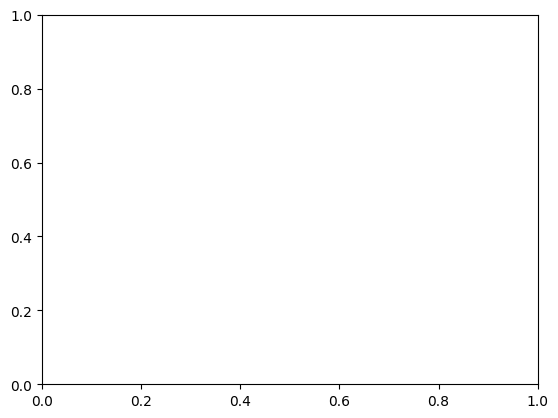

In [4]:
# import 
import Analysis_repo
from Analysis_repo import sourceCode
from Analysis_repo import notebook_import_library as importLibrary


# Get the data form the Source code file
try:
    consumer_credit_data = sourceCode.sendConsumerCreditData()[5:] # get consumer credit data
    interest_rate_data = sourceCode.sendInterestRateData()[5:] # get interest rate data
    #print(consumer_credit_data) # print out the columns
except Exception as e:
    print("An exception occurred:", e)
    
# actual for analysis
credit_data_analysis = consumer_credit_data


In [5]:
# 1. Dimensions of the datatset
print("Rows:", credit_data_analysis.shape[0] , "Cols:", credit_data_analysis.shape[1])

# 2. Data types in the dataset
#print("Data types:", credit_data_analysis.info())

# 3. Checking for missing values in dataset
#count_of_missing = credit_data_analysis.isna().sum()
#print("Missing values:", count_of_missing)
dropped = consumer_credit_data.drop(['Revolving consumer credit owned by commercial banks, not seasonally adjusted flow, monthly rate (discontinued after February 2011)'], axis=1)
# dropped.columns


# >>>>> handling missing values

Rows: 130 Cols: 52


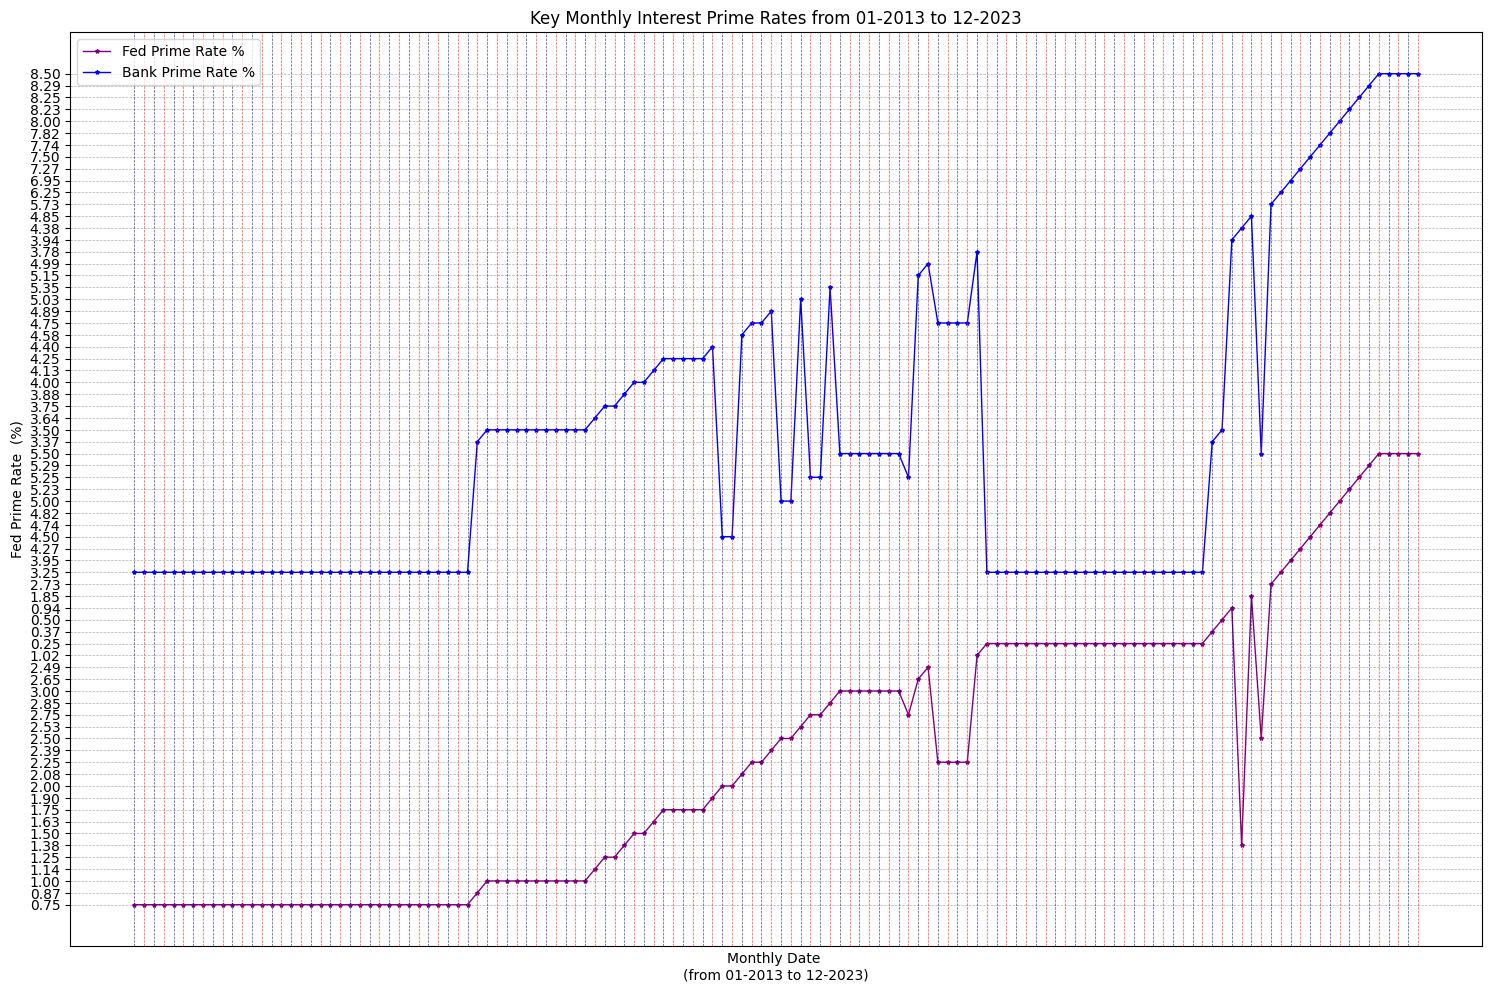

In [8]:
# Get Prime rate data
fed_prime_rate = interest_rate_data["The rate charged for primary credit under   amendment to the Board's Regulation A"]
bank_prime_rate = interest_rate_data["Average majority prime rate charged by banks   on short-term loans to business,   quoted on an investment basis"]
prime_rate_date = interest_rate_data["Series Description"]

importLibrary.plt.figure(figsize=(15, 10)) # setting plot szie

# Create a line plot(s) for the prime rates
importLibrary.plt.plot(prime_rate_date, fed_prime_rate, color='purple', marker='*', linestyle='-', linewidth=1, markersize=3, label='Fed Prime Rate %')
importLibrary.plt.plot(prime_rate_date, bank_prime_rate, color='blue', marker='*', linestyle='-', linewidth=1, markersize=3, label='Bank Prime Rate %')

# Add labels and title
importLibrary.plt.title('Key Monthly Interest Prime Rates from 01-2013 to 12-2023')
importLibrary.plt.xlabel('Monthly Date \n(from 01-2013 to 12-2023)')
importLibrary.plt.xticks([]) # hide the date tick labels
importLibrary.plt.ylabel('Fed Prime Rate  (%)')
importLibrary.plt.tight_layout(pad=1) # opens spaces of for percentages on y-axis

# Cutomize grid on the plot
importLibrary.plt.grid(True, linestyle='--', linewidth=0.5, which='both') # plot grid

    
grid_vertical_lines = list(prime_rate_date)
for month in grid_vertical_lines:
    if int(month[-2:]) % 2 == 0:
        importLibrary.plt.axvline(x=month, color='red', linestyle='--', linewidth=0.5, alpha=0.7)
    else:
        importLibrary.plt.axvline(x=month, color='navy', linestyle='--', linewidth=0.5, alpha=0.7)
    
# Show the legend and output the plot
importLibrary.plt.legend()
importLibrary.plt.show() #show plot



# Insighs on Plot


# improvement ideas
# 1. Group rates by Q
# 2. Color code rate dot by previous price movement
# 3. 




In [ ]:
print(list(prime_rate_date)[0])
print(list(prime_rate_date)[0][-2:])


2013-01
01


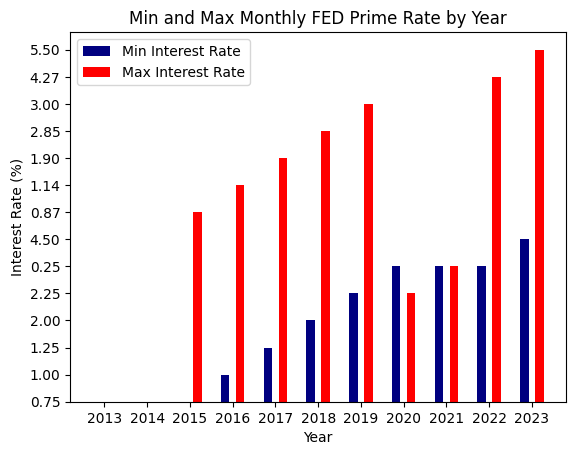

In [ ]:
# Create df that will store the IR date, fed and bank prime rates
FED_IR_df = importLibrary.pd.DataFrame()
FED_IR_df['PR_Date'] = prime_rate_date
FED_IR_df['FED_PR'] = fed_prime_rate
FED_IR_df['BANK_PR'] = bank_prime_rate
Year_list = [] #store year values

for year_value in prime_rate_date: # create list of year values
    Year_list.append(year_value[:4])
    
FED_IR_df['Year'] = Year_list # create year column
FED_IR_df['Year'] = FED_IR_df['Year'].astype(int) 

# df of max and min prime rate grouped by year
grouped_data = FED_IR_df.groupby('Year')['FED_PR'].agg(['max', 'min']).reset_index()

# Bar plots for max interest rates
fig, ax = importLibrary.plt.subplots()
ax.bar(grouped_data['Year'], grouped_data['min'], width=0.20, color='navy', label='Min Interest Rate') # max interest rates plot
ax.bar(grouped_data['Year']+ 0.35, grouped_data['max'], width=0.20, color='red', label='Max Interest Rate') # min interest rates plot

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Interest Rate (%)')
ax.set_title('Min and Max Monthly FED Prime Rate by Year')
ax.set_xticks(grouped_data['Year'] + 0.35 /2) # set year value to tick
ax.set_xticklabels(grouped_data['Year'])
ax.legend(loc='upper left')


# Show the plot
importLibrary.plt.show()

In [ ]:
# regression analysis section (which rate are the best predictors?)

# 1. Add consmer credit col to the rate data and work from there

In [ ]:
# regression section insights, findings and conclusion 

In [ ]:
# other questions (can fed rate prediict consumer credit or vice versa?)

In [ ]:
# conclusion of study

### Dictionary

1. <b>Revolving credit</b><br> A type of credit that allows borrowers to repeatedly borrow up to a certain credit limit. As the borrower repays the outstanding balance, the available credit is replenished, and they can use it again. Credit cards and lines of credit are common examples of revolving credit.<br>

2. <b>Non-revolving credit</b><br>A one-time loan that is typically repaid in fixed installments over a specified period. Once the borrower repays the loan, the credit is no longer available. Installment loans for major purchases, such as auto loans or student loans, fall under the category of non-revolving credit.

3. <b>Consumer credit owned</b><br>When a financial institution or lender holds consumer credit on its balance sheet without bundling or selling it as a security, it is referred to as "consumer credit owned."In this scenario, the lender retains ownership of the individual loans, and the loans are not packaged or sold to external investors.The lender continues to collect payments and is exposed to the credit risk associated with the loans.

4. <b>Consumer credit owned and securitized</b><br>"Consumer credit owned and securitized" refers to the process of bundling individual consumer loans into a financial instrument known as a security.These securities are then sold to investors in the financial markets. The process of securitization involves creating a pool of loans, dividing it into different tranches with varying levels of risk, and issuing securities backed by these tranches.
Once securitized, the lender no longer holds the individual loans on its balance sheet, and the risk associated with those loans is transferred to the investors who hold the securities. E.g, Mortgage-backed securities (MBS) and asset-backed securities (ABS)

5. <b>Federal Reserve</b><br>
The Federal Reserve, often abbreviated as the Fed, is the central banking system of the United States. It was created by the Federal Reserve Act of 1913 in response to a series of financial panics in the late 19th and early 20th centuries. The Federal Reserve plays a crucial role in the country's monetary and financial system. The Federal Reserve's actions and decisions have a significant impact on the U.S. and global financial markets and the broader economy.

5. <b>Credit Union</b><br>
A credit union is a member-owned financial cooperative that provides financial services to its members. Credit unions are not-for-profit organizations, and their primary goal is to serve the financial needs of their members rather than to generate profits for shareholders. Members of a credit union typically share a common bond, such as being employees of the same company, belonging to the same community, or having a common association.



